In [1]:
import numpy as np
from scipy.sparse import random
import scipy.sparse.linalg as sp_linalg
from scipy.sparse.linalg import LinearOperator
from scipy.sparse.linalg import aslinearoperator
import matplotlib.pyplot as plt

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [41]:
N = 1000

In [42]:
A_sparse = random(N, N, density=1)
A_dense = A_sparse.todense()
v = np.random.rand(N)
x2 = A_dense.dot(v)
xs = A_sparse.dot(v)

In [43]:
A2 = np.zeros((N, N), dtype=np.float64)
rows, cols = A_sparse.row, A_sparse.col
A2[rows, cols] = A_sparse.data

In [53]:
Asl = aslinearoperator(A_sparse)

In [54]:
%timeit A_dense.dot(v)

164 µs ± 2.32 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [55]:
%timeit Asl.dot(v)

839 µs ± 18 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
cd /home/g.samarth/test_eigprob/test

/home/g.samarth/test_eigprob/test


In [6]:
run linOp_eigprob.py

A:
 [[0.77307223 0.         0.         ... 0.         0.         0.        ]
 [0.         0.01788934 0.         ... 0.         0.         0.        ]
 [0.         0.         0.47110794 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.4628474  0.         0.        ]
 [0.         0.         0.         ... 0.         0.56015144 0.        ]
 [0.         0.         0.         ... 0.         0.         0.22984558]]


In [7]:
Adl = aslinearoperator(A_dense)
Asl = aslinearoperator(A_sparse)

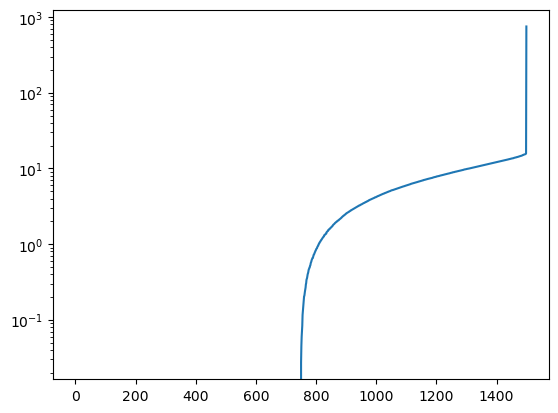

In [16]:
evals, evecs = np.linalg.eigh(A_dense)
plt.semilogy(evals)
plt.show()

In [17]:
%timeit scipy.sparse.linalg.eigsh(Adl, k=5, sigma=1, which='LM')

ValueError: Error in inverting [A-sigma*M]: function gmres_loose did not converge (info = 15000).

In [9]:
%timeit scipy.sparse.linalg.eigsh(Asl, k=N-1, which='Si')

ValueError: which must be one of LM SM LA SA BE

In [69]:
%timeit scipy.sparse.linalg.eigsh(L_op, k=N-1, which='SM')

5.12 s ± 328 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [71]:
%timeit np.linalg.eigh(A)

417 ms ± 12 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [73]:
%timeit scipy.sparse.linalg.eigsh(A, k=N-1)

6.6 s ± 456 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [13]:
ev1 = np.sort(eigval_1)[:-1]
ev2 = np.sort(eigval_2)

In [25]:
A.shape

(1500, 1500)